# CUSTOMER DATA ANALYSIS

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_excel(r"C:\Users\BAPS\Downloads\Cust Dataset.xlsx")  
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I100008,C199951,Male,65,Clothing,5,1500.40,Cash,2022-07-10,Emaar Square Mall
1,I100014,C138893,Male,55,Cosmetics,5,203.30,Cash,2021-06-18,Viaport Outlet
2,I100015,C132779,Female,35,Clothing,2,600.16,Debit Card,2021-03-04,Mall of Istanbul
3,I100024,C244411,Female,67,Books,3,45.45,Credit Card,2023-01-05,Emaar Square Mall
4,I100027,C150002,Female,19,Technology,4,4200.00,Cash,2022-05-18,Mall of Istanbul


In [16]:
print("Shape:", df.shape)
df.info()

Shape: (1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      1000 non-null   object        
 1   customer_id     1000 non-null   object        
 2   gender          1000 non-null   object        
 3   age             1000 non-null   int64         
 4   category        1000 non-null   object        
 5   quantity        1000 non-null   int64         
 6   price           1000 non-null   float64       
 7   payment_method  1000 non-null   object        
 8   invoice_date    1000 non-null   datetime64[ns]
 9   shopping_mall   1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 78.3+ KB


In [17]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

##### Add Revenue Column for Analyzing the Data more efficiently

In [18]:
df['Revenue'] = df['quantity'] * df['price']

##### Add Age_Group Column to Understand the Trends and Patterns

In [24]:
bins = [0, 18, 25, 35, 45, 55, 120]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56+']

df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [25]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Revenue,Age_Group
0,I100008,C199951,Male,65,Clothing,5,1500.40,Cash,2022-07-10,Emaar Square Mall,7502.00,56+
1,I100014,C138893,Male,55,Cosmetics,5,203.30,Cash,2021-06-18,Viaport Outlet,1016.50,46-55
2,I100015,C132779,Female,35,Clothing,2,600.16,Debit Card,2021-03-04,Mall of Istanbul,1200.32,26-35
3,I100024,C244411,Female,67,Books,3,45.45,Credit Card,2023-01-05,Emaar Square Mall,136.35,56+
4,I100027,C150002,Female,19,Technology,4,4200.00,Cash,2022-05-18,Mall of Istanbul,16800.00,18-25


# Exploratory data Analysis(EDA)

### 1. How is the shopping distribution according to gender? 

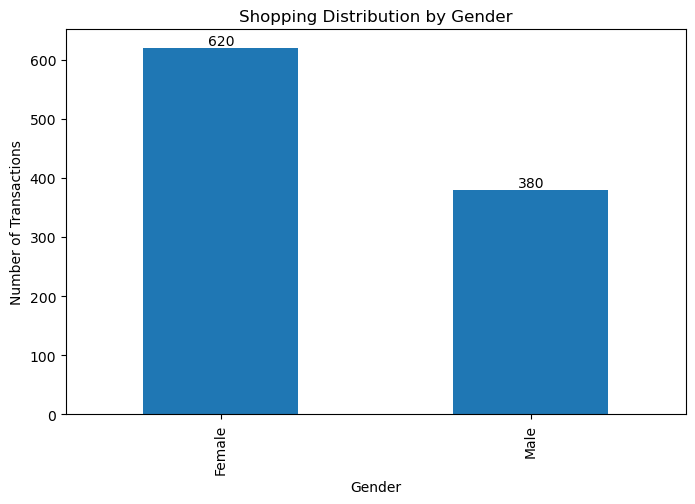

In [46]:
plt.figure(figsize=(8,5))  

ax = df['gender'].value_counts().plot(
    kind='bar',
    title='Shopping Distribution by Gender')

plt.xlabel("Gender")
plt.ylabel("Number of Transactions")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center',
        va='bottom')

plt.show()

##### We observe that Female contributes a higher share of total revenue, 
indicating stronger purchasing power or preference for higher-priced products. This insight can be used to design targeted marketing strategies.

### 2. Which gender did we sell more products to? 

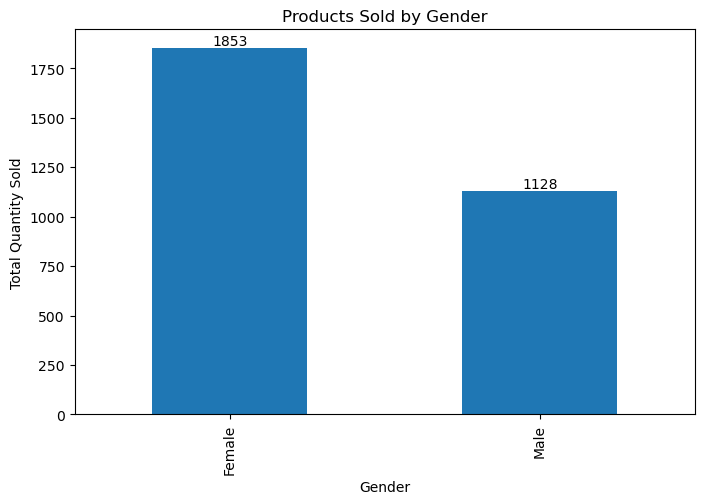

In [41]:
plt.figure(figsize=(8,5)) 

ax = df.groupby('gender')['quantity'].sum().plot(
    kind='bar',
    title='Products Sold by Gender')

plt.xlabel("Gender")
plt.ylabel("Total Quantity Sold")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center',
        va='bottom')

plt.show()

##### Female purchases a higher total quantity of products, showing a tendency toward bulk buying or higher consumption per transaction.

### 3. Which gender generated more revenue?

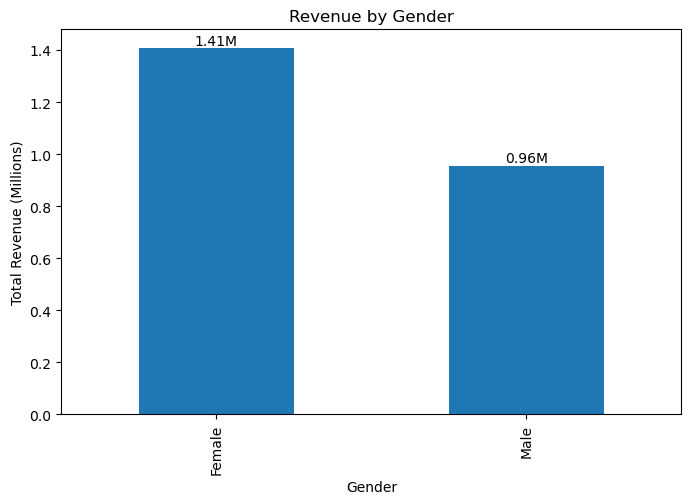

In [45]:
plt.figure(figsize=(8,5))

revenue_m = df.groupby('gender')['Revenue'].sum() / 1_000_000

ax = revenue_m.plot(
    kind='bar',
    title='Revenue by Gender')

plt.xlabel("Gender")
plt.ylabel("Total Revenue (Millions)")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}M",
        ha='center',
        va='bottom')

plt.show()

##### Even if transaction counts are similar, revenue contribution differs by gender, indicating variations in spending behavior and average order value.

### 4. Distribution of purchase categories relative to other columns?

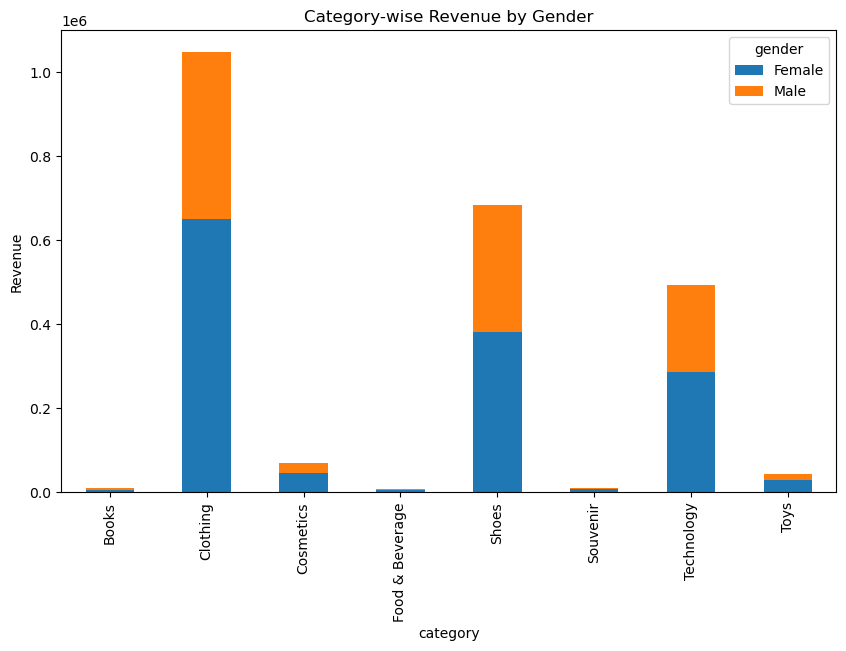

In [51]:
category_gender = df.pivot_table(
    index='category',
    columns='gender',
    values='Revenue',
    aggfunc='sum'
)

category_gender.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Category-wise Revenue by Gender")
plt.ylabel("Revenue")
plt.show()

##### Certain product categories generate significantly more revenue from one gender compared to the other, highlighting category-specific preferences.

### 5. How is the shopping distribution according to age? 

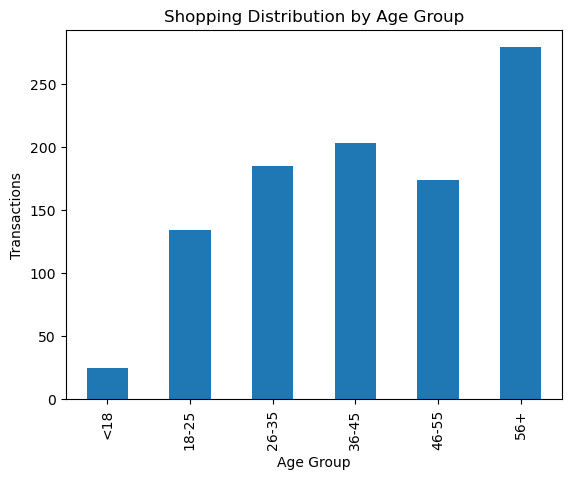

In [30]:
df['Age_Group'].value_counts().sort_index().plot(
    kind='bar',
    title='Shopping Distribution by Age Group'
)
plt.xlabel("Age Group")
plt.ylabel("Transactions")
plt.show()

##### The majority of transactions come from a 56+ age group, identifying it as the core customer base.

### 6. Which age cat did we sell more products to?

C:\Users\BAPS\AppData\Local\Temp\ipykernel_2156\3705238101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['quantity'].sum().plot(


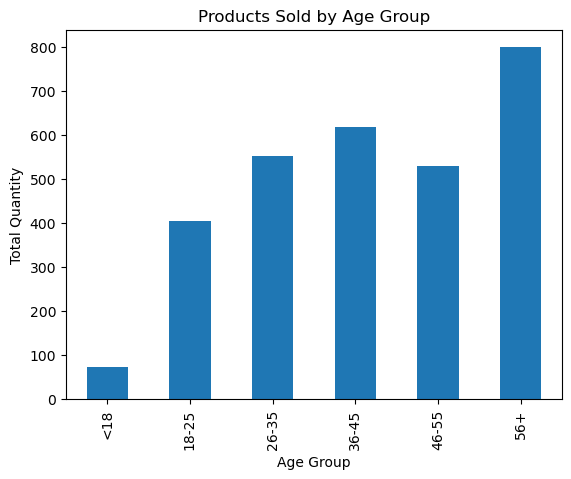

In [31]:
df.groupby('Age_Group')['quantity'].sum().plot(
    kind='bar',
    title='Products Sold by Age Group'
)
plt.xlabel("Age Group")
plt.ylabel("Total Quantity")
plt.show()

### 7. Which age cat generated more revenue? 

C:\Users\BAPS\AppData\Local\Temp\ipykernel_2156\1719767105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Revenue'].sum().plot(


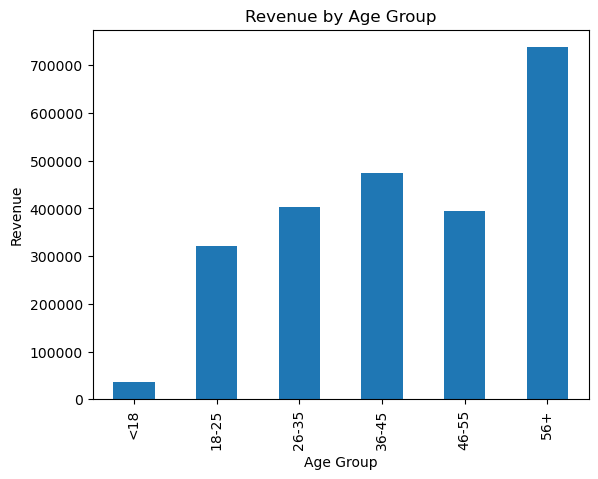

In [32]:
df.groupby('Age_Group')['Revenue'].sum().plot(
    kind='bar',
    title='Revenue by Age Group'
)
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.show()

### 8. Distribution of purchase categories relative to other columns? 

C:\Users\BAPS\AppData\Local\Temp\ipykernel_2156\3150826865.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  category_age = df.pivot_table(


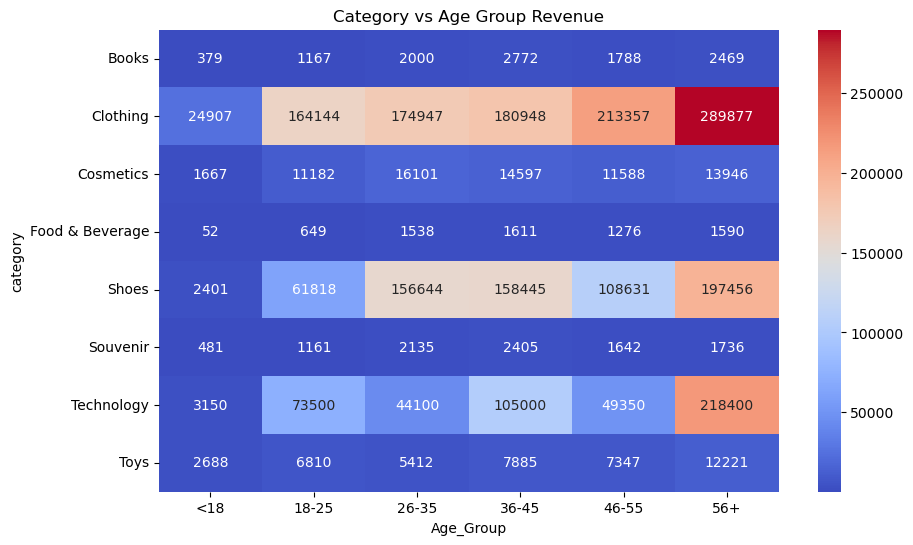

In [33]:
category_age = df.pivot_table(
    index='category',
    columns='Age_Group',
    values='Revenue',
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(category_age, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Category vs Age Group Revenue")
plt.show()

### 9. Does the payment method have a relation with other columns?  

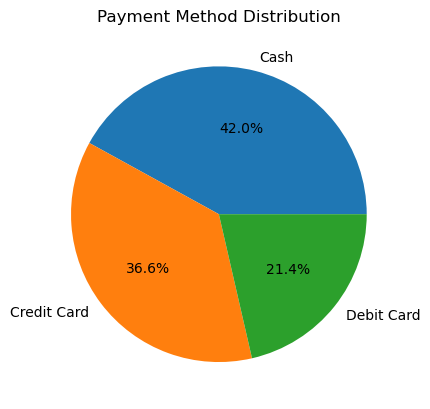

In [34]:
df['payment_method'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Payment Method Distribution'
)
plt.ylabel("")
plt.show()

### 10. How is the distribution of the payment method?

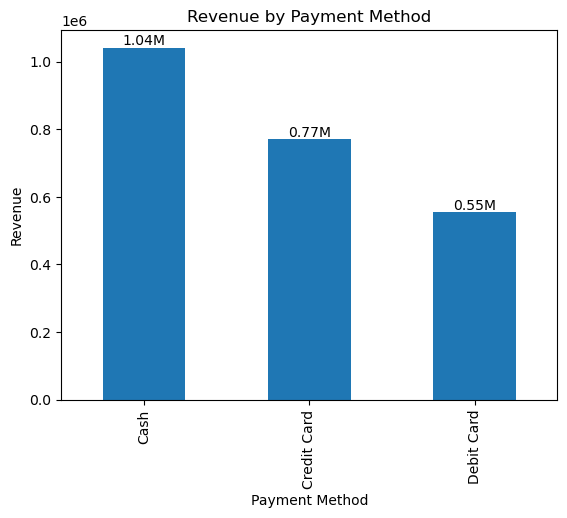

In [53]:
ax = df.groupby('payment_method')['Revenue'].sum().plot(
    kind='bar',
    title='Revenue by Payment Method')

plt.xlabel("Payment Method")
plt.ylabel("Revenue")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height() / 1_000_000:.2f}M",
        ha='center',
        va='bottom')

plt.show()

### Payment Method vs Gender

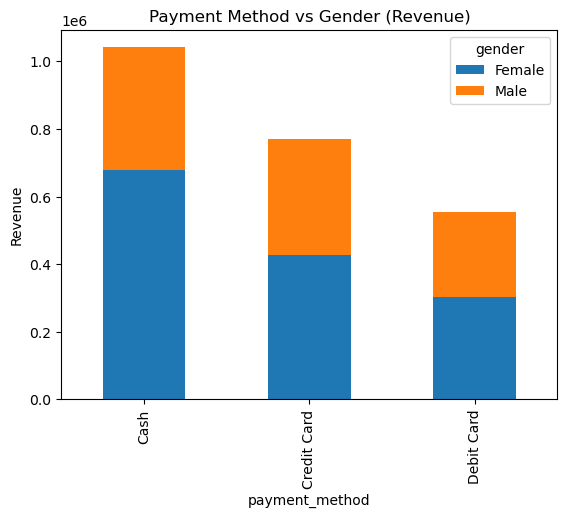

In [36]:
payment_gender = df.pivot_table(
    index='payment_method',
    columns='gender',
    values='Revenue',
    aggfunc='sum'
)

payment_gender.plot(kind='bar', stacked=True)
plt.title("Payment Method vs Gender (Revenue)")
plt.ylabel("Revenue")
plt.show()

### Revenue Distribution 

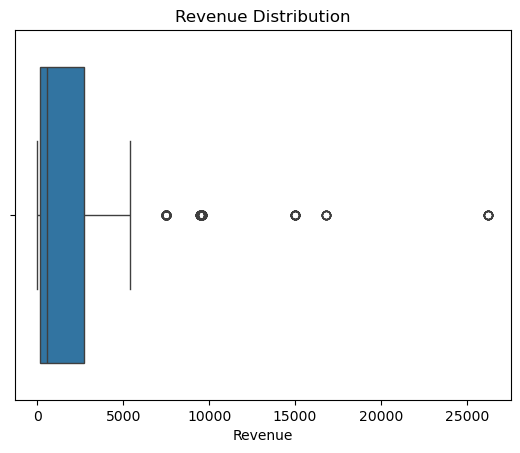

In [37]:
sns.boxplot(x=df['Revenue'])
plt.title("Revenue Distribution")
plt.show()

### Correlation Heatmap

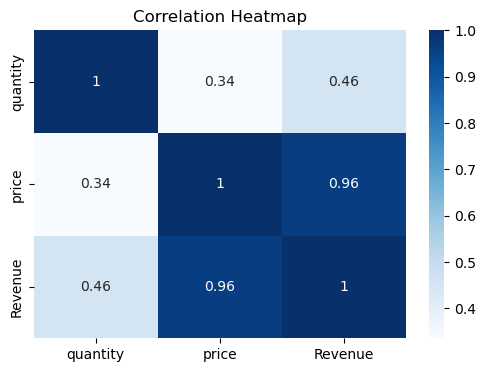

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['quantity','price','Revenue']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

##### Key Business Insights

- The 26–45 age group contributes the highest revenue.
- Credit card is the most preferred payment method.
- Certain product categories perform better among specific genders.

##### Recommendations

- Target high-revenue age groups with premium offers.
- Promote digital payment methods with discounts.
- Focus marketing on top-performing categories.


In [56]:
df.to_excel("final_dataset.xlsx", index=False)